In [389]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [390]:
df = pd.read_csv(r'.\Dataset\Dataset\Train.csv')
df.head()

,Text_ID,Data,Response
0,1649,Lunch was surreal .,0
1,4705,It offers certificates of completion for many ...,0
2,3320,No amount of educational funds will drag the p...,0
3,6182,"No, lets stay scattered across the earth and t...",0
4,7594,The two teenagers are charged with assaulting ...,0


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7492 entries, 0 to 7491
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text_ID   7492 non-null   int64 
 1   Data      7492 non-null   object
 2   Response  7492 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 175.7+ KB


In [392]:
# drop the TextID column
df.drop('Text_ID', axis=1, inplace=True)

In [393]:
#view one of the text randomly 
random = np.random.randint(0,len(df))
print(random)
print(df.iloc[random]['Data'], df.iloc[random]['Response'])

3865
This thread has reduced me to tears so many times that I sometimes avoid it , and yet i thank the OP for it 0


In [394]:
print("The total number of reviews is", df.shape[0])

The total number of reviews is 7492


#### Handle Diacritics using text normalization

In [395]:
def simplify(text):
    '''Function to handle the diacritics in the text'''
    import unicodedata
    try:
        text = unicode(text, 'utf-8')
    except NameError:
        pass
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    return str(text)

In [396]:
df['Data'] = df['Data'].apply(simplify)

In [397]:

def remove_unwanted_symbols_tags(df):
    '''Function to remove [#, @, http, www] symbols from the text'''

    #remove all the hashtags --> strings starting with #
    df['Data'].replace(r'#\w+','',regex=True,inplace=True)
    #remove all the user handles --> strings starting with @
    df['Data'].replace(r'@\w+','',regex=True,inplace=True)
    #remove all the strings starting with http 
    df['Data'].replace(r'http\S+','',regex=True,inplace=True)
    #remove all the strings starting with www
    df['Data'].replace(r'www\S+','',regex=True,inplace=True)
    return df

In [398]:
df = remove_unwanted_symbols_tags(df)

C:\Users\JeevapurS\AppData\Local\Temp\ipykernel_3208\2464355721.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Data'].replace(r'#\w+','',regex=True,inplace=True)
C:\Users\JeevapurS\AppData\Local\Temp\ipykernel_3208\2464355721.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [399]:
#view one of the text randomly 
random = np.random.randint(0,len(df))
print(random)
print(df.iloc[random]['Data'], df.iloc[random]['Response'])

6917
Yes, he has a red Firebird so the wigger 's parents thought he had promise just like all those fictional characters on t.v. 1


#### Tokenize using tweet tokenizer

In [400]:
from nltk.tokenize import TweetTokenizer

#test on a sample text
sample = 'wonderfl :-)  when are you coming for #party'
tweet_tokenize = TweetTokenizer(preserve_case=True)
tweet_tokenize.tokenize(sample)

['wonderfl', ':-)', 'when', 'are', 'you', 'coming', 'for', '#party']

In [401]:
#tokenize the comments-data in the dataframe using TweetTokenizer
tokenizer = TweetTokenizer(preserve_case=True)
df['Data'] = df['Data'].apply(tokenizer.tokenize)

#view the tokenized tweets
df.head(3)

,Data,Response
0,"[Lunch, was, surreal, .]",0
1,"[It, offers, certificates, of, completion, for...",0
2,"[No, amount, of, educational, funds, will, dra...",0


In [402]:
# Remove Stopwords

from nltk.corpus import stopwords

stop_words = stopwords.words('english')

#add additional stop words to be removed from the text
additional_list = []

for words in additional_list:
    stop_words.append(words)

#### Remove stopwords

In [403]:
def remove_stopwords(text):
    '''Function to remove the stop words from the text corpus'''
    cleaned_text = [word for word in text if not word in stop_words]
    return cleaned_text


df['Data'] = df['Data'].apply(remove_stopwords)

In [404]:
df.head()

,Data,Response
0,"[Lunch, surreal, .]",0
1,"[It, offers, certificates, completion, many, c...",0
2,"[No, amount, educational, funds, drag, populat...",0
3,"[No, ,, lets, stay, scattered, across, earth, ...",0
4,"[The, two, teenagers, charged, assaulting, Ros...",0


#### Remove special char

In [405]:
def rem_nonalpha(text):
    '''Function to remove the non-alphanumeric characters from the text'''
    text = [word for word in text if word.isalpha()]
    return text

#remove the non alpha numeric characters from the data tokens
df['Data'] = df['Data'].apply(rem_nonalpha)

In [406]:
df.head()

,Data,Response
0,"[Lunch, surreal]",0
1,"[It, offers, certificates, completion, many, c...",0
2,"[No, amount, educational, funds, drag, populat...",0
3,"[No, lets, stay, scattered, across, earth, try...",0
4,"[The, two, teenagers, charged, assaulting, Ros...",0


In [407]:
from collections import Counter
results = Counter()
df['Data'].apply(results.update)
#print the top 10 most common terms in the tweet 
print(results.most_common(10))

[('I', 2539), ('white', 570), ('like', 517), ('The', 428), ('people', 400), ('would', 345), ('one', 340), ('get', 311), ('YouTube', 280), ('White', 255)]


In [408]:
# created a length of Data column to use as a feature
df['text_length'] = df['Data'].apply(lambda x: len(x))

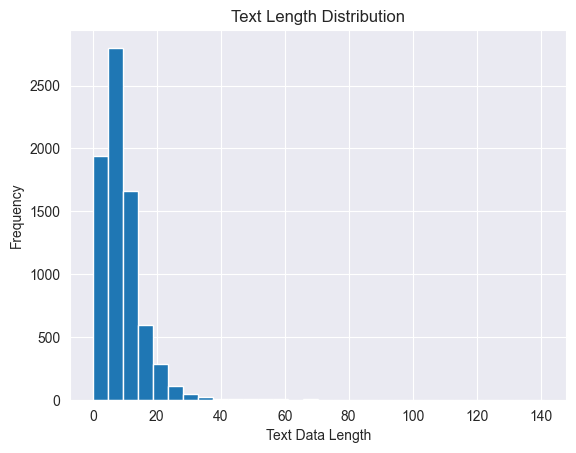

In [409]:
sns.set_style('darkgrid')
plt.hist(df.text_length,bins=30)
plt.xlabel('Text Data Length')
plt.ylabel('Frequency')
plt.title('Text Length Distribution')
plt.show()

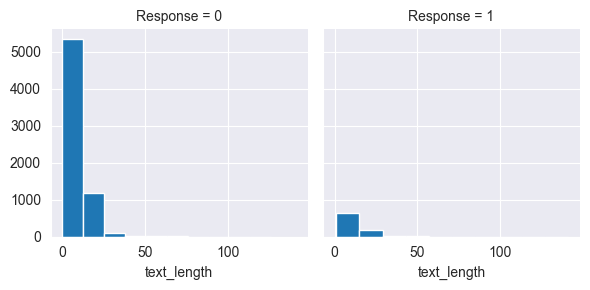

In [410]:
p = sns.FacetGrid(df, col='Response')
p.map(plt.hist, 'text_length')

In [411]:
#check for the null values
df.isnull().sum()

Data           0
Response       0
text_length    0
dtype: int64

In [412]:
df['Data'] = df['Data'].apply(lambda x: ' '.join(x))

In [413]:
df.head()

,Data,Response,text_length
0,Lunch surreal,0,2
1,It offers certificates completion many courses,0,6
2,No amount educational funds drag population sl...,0,7
3,No lets stay scattered across earth try change...,0,14
4,The two teenagers charged assaulting Rose Powe...,0,11


# Model Training

In [414]:
# split data into input X and output y

X = df['Data']
y = df['Response']

In [415]:
#plit the data using train_test split
from sklearn.model_selection import train_test_split

state= 51
test_size = 0.2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size,random_state=state,stratify=df['Response'])
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5993,) (1499,) (5993,) (1499,)


In [416]:
#import tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#instantiate the vectorizer 
vectorizer = TfidfVectorizer(max_features=5000)


In [417]:
#fit on the training data
X_train = vectorizer.fit_transform(X_train)
#transform the test data
X_test = vectorizer.transform(X_test)

#check the shape
X_train.shape, X_test.shape

((5993, 5000), (1499, 5000))

#### Model building: Ordinary Logistic Regression

In [418]:
#import the models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [419]:
#instantiate the models with default hyper-parameters
clf = LogisticRegression()
clf.fit(X_train,y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [420]:
#import the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [421]:
#get the model accuracy on the training and the test set
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,test_predictions))

Accuracy Score on training set 0.89271
Accuracy Score on test set 0.88993


#### Accuracy is never a good metric for an imbalanced dataset as in this case. This can be highighted using the f1 score. A low f1-score for a label indicate poor performance of the model.

In [422]:
print('Classification Report Training set')
print('\n')
print(classification_report(y_train,train_predictions))

Classification Report Training set


              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5313
           1       0.89      0.06      0.12       680

    accuracy                           0.89      5993
   macro avg       0.89      0.53      0.53      5993
weighted avg       0.89      0.89      0.85      5993



In [423]:
print('Classification Report Testing set')
print('\n')
print(classification_report(y_test,test_predictions))

Classification Report Testing set


              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1329
           1       0.78      0.04      0.08       170

    accuracy                           0.89      1499
   macro avg       0.83      0.52      0.51      1499
weighted avg       0.88      0.89      0.84      1499



##### The model's f1-score is low for Response-1, which indicates the imbalanced data for hate comments in the data

### Weighted Logistic Regression Or Cost Sensitive Logistic Regression

In [424]:
df['Response'].value_counts()

Response
0    6642
1     850
Name: count, dtype: int64

##### the minority to majority class ration is 1:7

In [425]:
#define the weight of the class labels using inverse ratio
weights = {0:1.0, 1:7.0}

#instantiate the logistic regression model and account for the weights to be applied for model coefficients update magnitude
clf = LogisticRegression(solver='lbfgs',class_weight=weights)

#fit and predict
clf.fit(X_train,y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [426]:
#classification report
print('Classification Report Training set')
print('------------------------------------')
print('\n')
print(classification_report(y_train,train_predictions))
print('\n')

print('Classification Report Testing set')
print('------------------------------------')
print('\n')
print(classification_report(y_test,test_predictions))

Classification Report Training set
------------------------------------


              precision    recall  f1-score   support

           0       1.00      0.94      0.97      5313
           1       0.68      0.99      0.81       680

    accuracy                           0.95      5993
   macro avg       0.84      0.96      0.89      5993
weighted avg       0.96      0.95      0.95      5993



Classification Report Testing set
------------------------------------


              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1329
           1       0.39      0.54      0.45       170

    accuracy                           0.85      1499
   macro avg       0.66      0.71      0.68      1499
weighted avg       0.88      0.85      0.86      1499



### Regularization and Hyperparameter tuning:

In [427]:
#import the required libraries for grid search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# define search space
from scipy.stats import loguniform

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)


#check the search space 
print(space)

{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l1', 'l2', 'elasticnet'], 'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C8C2D075D0>}


##### Fine tuned Model with Balanced Class Weights

In [429]:
#define the model with balanced class weights
balanced_weights = {0:1.0, 1:1.0}

logR_model = LogisticRegression(class_weight=balanced_weights)

#define the number of folds 
folds = StratifiedKFold(n_splits=4)

# define search
grid_search = RandomizedSearchCV(estimator=logR_model,param_distributions=space, n_iter=100, scoring='recall', n_jobs=-1, cv=folds, random_state=state)

#fit grid search on the train data
grid_result = grid_search.fit(X_train,y_train)

C:\Users\JeevapurS\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
248 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
52 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\JeevapurS\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JeevapurS\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\JeevapurS\AppData\Roaming\Pytho

In [430]:
#retrieve the best model 
grid_result.best_estimator_

LogisticRegression(C=20.867237575208858, class_weight={0: 1.0, 1: 1.0},
                   penalty='l1', solver='liblinear')